In [13]:
# pip install pandas

SyntaxError: invalid syntax (556018794.py, line 2)

In [14]:
pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib!=3.6.1,>=3.4 from https://files.pythonhosted.org/packages/9f/6e/264673e64001b99d747aff5a288eca82826c024437a3694e19aed1decf46/matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/61/cf/08c4954c944799458690eb0e498209fb6a2e79e20

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('all_data.csv')

In [4]:
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [9]:
print(df.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13



**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Analysis

We are going to get an idea of the data we are looking at

First analysis is too see how many countries we will be working with

In [17]:
print(df['Country'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Next we will look at the year span in the data set to determine if the data is adequate to work with

In [18]:
print(f"Sampling years from {df['Year'].min()} till {df['Year'].max()}")

Sampling years from 2000 till 2015


The 15 years sample seems adequate to examine for recent times (millennium), however other factors may also effect the actual results example Covid and disasters

Now we will dive into the data

### Cleaning the data

We are going to rename column name in order to make working with the data a lot easier

In [21]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = "columns")


### Has life expectancy increased over time in the six nations?

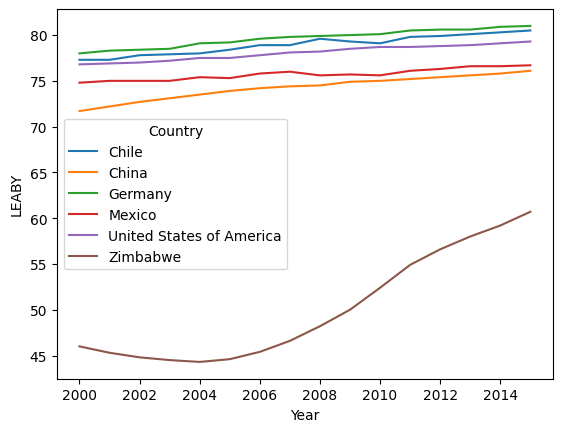

<Figure size 640x480 with 0 Axes>

In [22]:
sns.lineplot(data=df, x='Year', y='LEABY', hue='Country')
plt.show()
plt.clf()

### Has GDP increased over time in the six nations?

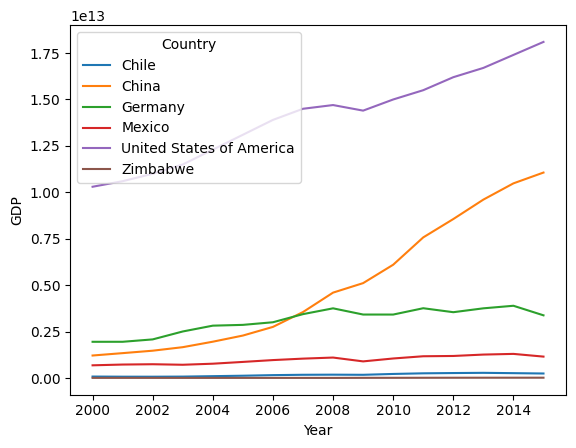

<Figure size 640x480 with 0 Axes>

In [23]:
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.show()
plt.clf()

### Is there a correlation between GDP and life expectancy of a country?

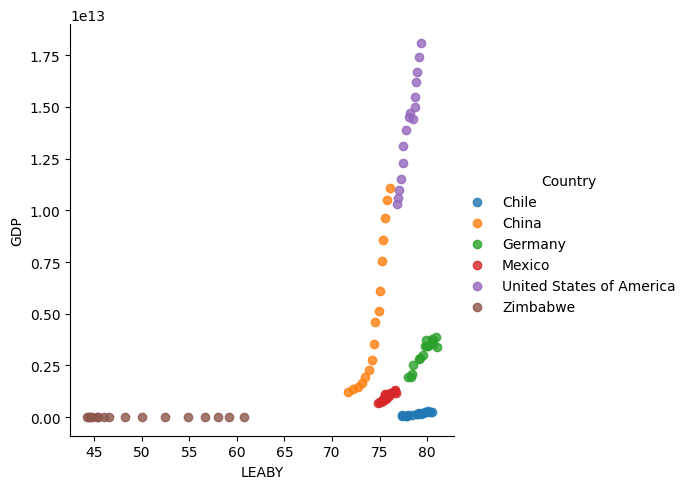

<Figure size 640x480 with 0 Axes>

In [27]:
sns.lmplot(x ='LEABY', y='GDP', hue = 'Country', data = df, fit_reg= False)
plt.show()
plt.clf()

### What is the average life expectancy in these nations?

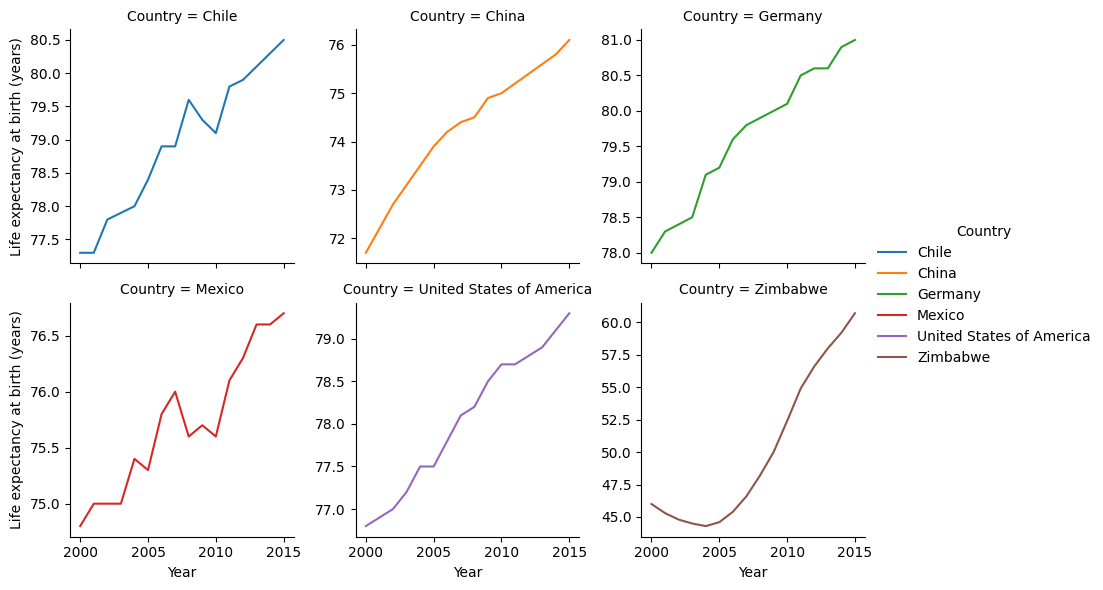

In [30]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY


### What is the distribution of that life expectancy?